# hypothesis Testing (CORE)
**Marco Jimenez 7/13/2022**

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [99]:
# Loading data
df = pd.read_csv('Data/insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

- $H_0$ (Null Hypothesis): Insurance charges are the same for smokers and non-smokers
- $H_A$ (Alternative Hypothesis): Insurance charges are significantly different for smokers and non-smokers

## Creating groups

In [100]:
df['is_smoker'] = df['smoker'].str.contains('yes', case=False)
df.head()

,age,sex,bmi,children,smoker,region,charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [101]:
# Separating groups into two variables
smokers = df.loc[df['is_smoker']==True, ['charges','is_smoker']]
non_smoker = df.loc[df['is_smoker']==False, ['charges','is_smoker']]

print(f"There are {len(smokers)} smokers." )
print(f"There are {len(non_smokers)} non smokers." )

There are 274 smokers.
There are 1064 non smokers.


In [102]:
# Creating features for testing
smokers_grp = smokers['charges']
non_smokers_grp = non_smoker['charges']

## 2 Sample t-test

### Assumption 1: There are no outliers

In [103]:
# Testing for outliers in smokers group
outliers_y = np.abs(stats.zscore(smokers_grp)) > 3
outliers_y.sum()

0

In [104]:
# Testing for outliers in non_smokers group
outliers_n = np.abs(stats.zscore(non_smokers_grp)) > 3
outliers_n.sum()

24

In [105]:
# Removing outliers from non_smokers group
non_smokers_grp.loc[~outliers_n]

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

> The outliers have been removed and now the data meets the assumption of no outliers

### Assumption 2: Both groups are normally distributed

In [106]:
# Checking distribution in smokers group
result = stats.normaltest(smokers_grp)
print(result)
result.pvalue < .05 

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [107]:
# Checking distribution in smokers group
result = stats.normaltest(non_smokers_grp)
print(result)
result.pvalue < .05 

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)


True

> Both groups returned a p-value that is less than .05. I therefore reject the assumptions null and support the alternative hypothesis that the groups are NOT normally distributed. However, according to the hypothesis testing guide, the sample sizes are large enough to proceed without meeting the assumption of normal distribution.

### Assumption 3: Both groups have equal variance

In [108]:
# Checking variance w/ stats.levene test
result = stats.levene(smokers_grp, non_smokers_grp)
print(result)
result.pvalue<.05

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)


True

> The stats.levene test returned a p-value that is less than .05. Therefore I reject the assumptions null hypothesis and support the alternative hypothesis that the two groups do NOT have equal variance.

## Statistical Test

> Since the two groups did not meet the assumption of equal variance, I will run the stats.ttest using equal_var=False, making it a Welch's T-test to account for the unequal variance

In [109]:
result = stats.ttest_ind(smokers_grp, non_smokers_grp, equal_var=False)
print(result)
result.pvalue<.05

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)


True

## Q1 Conclusion

- The Welch's T-test returned a p-value that is less than .05. I therefore reject the null hypothesis and support the alternative hypothesis that Insurance charges are significantly different for smokers and non-smokers.

In [110]:
# Displaying average insurance charges for each group
print(f'Average insurance charges for smokers {smokers_grp.mean():.2f}')
print(f'Average insurance charges for non_smokers {non_smokers_grp.mean():.2f}')

Average insurance charges for smokers 32050.23
Average insurance charges for non_smokers 8434.27


> Smokers on average are charged significantly higher amounts than non smokers

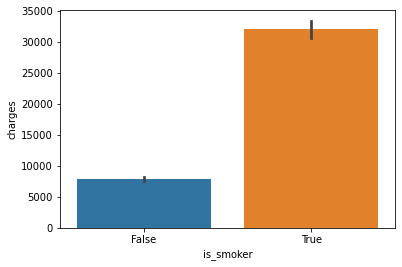

In [115]:
# Visualizing the difference
plot = pd.concat([smokers.loc[~outliers_y],
                  non_smoker.loc[~outliers_n]])
sns.barplot(data=plot, x='is_smoker', y='charges')

# Q2. Are men more likely to smoke than women?